In [56]:
%pip install sklearn-pandas

Note: you may need to restart the kernel to use updated packages.


In [57]:
#Standard Imports
import pandas as pd
import numpy as np

#for vizualtions
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#for transformations

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

# Modeling Evaluation
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# Pipelines
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

from sklearn_pandas import DataFrameMapper

In [3]:
df = pd.read_csv('C:/Users/its_u/Downloads/OHAS_Dataset.csv')

In [4]:
#first look of Dataset 
display(df.sample(5))

,Disease,Disease_CUI,Symptoms,Symptom_CUI,Weight,Height,Intensity,Severity,Age,Gender,BMI_Level,Region,Season
538,psychotic disorder,C0010346,blackout,C1565489,267,162,low,high,21,female,28.050,southeast,Summer
842,bipolar disorder,C0031511,halluci162tions auditory,C0012833,241,187,high,medium,30,female,32.780,southeast,Summer
609,depressive disorder,C0026896,nightmare,C0012766,1337,202,high,medium,23,male,37.800,southwest,Summer
2069,systemic infection,C0020305,cyanosis,C0038454,311,167,low,low,25,male,37.290,northeast,Summer
675,gout,C0025289,sore to touch,C0009676,124,183,medium,high,23,male,21.375,northwest,Winter


In [5]:
display(df.head(5))
display(df.tail(5))

,Disease,Disease_CUI,Symptoms,Symptom_CUI,Weight,Height,Intensity,Severity,Age,Gender,BMI_Level,Region,Season
0,influenza,C0162565,uncoordi162tion,C0039239,68,180,high,medium,24,female,27.900,southwest,Summer
1,influenza,C0162565,fever,C0000737,68,170,low,medium,23,male,33.770,southeast,Summer
2,influenza,C0162565,pleuritic pain,C0235704,68,162,low,low,24,male,33.000,southeast,Summer
3,influenza,C0162565,snuffle,C0030554,68,162,high,medium,34,male,22.705,northwest,Summer
4,influenza,C0162565,throat sore,C0030552,68,185,low,high,21,male,28.880,northwest,Winter


,Disease,Disease_CUI,Symptoms,Symptom_CUI,Weight,Height,Intensity,Severity,Age,Gender,BMI_Level,Region,Season
2124,migraine disorders,C0020532,dizziness,C0005959,61,162,high,high,20,male,38.170,northwest,Summer
2125,migraine disorders,C0020532,numbness,C0031256,61,173,low,low,20,female,36.860,northeast,Summer
2126,migraine disorders,C0020532,162usea,C0014591,61,168,high,high,24,female,32.395,southwest,Winter
2127,migraine disorders,C0020532,fever,C0025323,61,168,medium,medium,17,male,42.750,southeast,Winter
2128,migraine disorders,C0020532,splenomegaly,C0015967,61,168,high,high,17,male,25.080,northeast,Winter


In [6]:
df.shape

(2129, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Disease      2129 non-null   object 
 1   Disease_CUI  2119 non-null   object 
 2   Symptoms     2127 non-null   object 
 3   Symptom_CUI  2129 non-null   object 
 4   Weight       2129 non-null   int64  
 5   Height       2129 non-null   int64  
 6   Intensity    2127 non-null   object 
 7   Severity     2128 non-null   object 
 8   Age          2129 non-null   int64  
 9   Gender       2129 non-null   object 
 10  BMI_Level    2129 non-null   float64
 11  Region       2129 non-null   object 
 12  Season       2129 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 216.4+ KB


In [8]:
df.columns

Index(['Disease', 'Disease_CUI', 'Symptoms', 'Symptom_CUI', 'Weight', 'Height',
       'Intensity', 'Severity', 'Age', 'Gender', 'BMI_Level', 'Region',
       'Season'],
      dtype='object')

In [9]:
df.Disease.unique() #unique diseases

array(['influenza', 'gastritis', 'hypercholesterolemia', 'epilepsy',
       'insufficiency re162l', 'dehydration', 'hypothyroidism',
       'hernia hiatal', 'fibroid tumor', 'deglutition disorder',
       'osteoporosis', 'chronic alcoholic intoxication', 'asthma',
       'sepsis (invertebrate)', 'paranoia', 'ileus', 'neoplasm',
       'obesity morbid', 'primary malig162nt neoplasm', 'failure heart',
       'malig162nt neoplasm of breast', 'tonic-clonic epilepsy',
       'transient ischemic attack', 'malig162nt neoplasm of prostate',
       'embolism pulmo162ry', 'tricuspid valve insufficiency',
       'respiratory failure', 'degenerative polyarthritis', 'aphasia',
       'neoplasm metastasis', 'malig162nt tumor of colon', 'lymphoma',
       'anemia', 'chronic obstructive airway disease',
       'sickle cell anemia', 'coro162ry arteriosclerosis',
       'cholecystitis', 'psychotic disorder', 'thrombus',
       'chronic kidney failure', 'depressive disorder',
       'myocardial infarctio

In [10]:
#How many dieases with frequency -- maybe we can search on top ones and make others column of those which has frequency less
df.groupby('Disease').count().reset_index()

,Disease,Disease_CUI,Symptoms,Symptom_CUI,Weight,Height,Intensity,Severity,Age,Gender,BMI_Level,Region,Season
0,Alzheimer's disease,18,18,18,18,18,18,18,18,18,18,18,18
1,HIV,15,14,15,15,15,15,15,15,15,15,15,15
2,Pneumocystis carinii pneumonia,18,18,18,18,18,18,18,18,18,18,18,18
3,accident cerebrovascular,8,8,8,8,8,8,8,8,8,8,8,8
4,acquired immuno-deficiency syndrome,15,14,15,15,15,15,15,15,15,15,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,tonic-clonic seizures,17,17,17,17,17,17,17,17,17,17,17,17
144,transient ischemic attack,17,17,17,17,17,17,17,17,17,17,17,17
145,tricuspid valve insufficiency,10,10,10,10,10,10,10,10,10,10,10,10
146,ulcer peptic,12,12,12,12,12,12,12,12,12,12,12,12


In total of 148 diseases

In [11]:
print('Number diseases:', df.Disease.nunique())
df.groupby('Disease').size().sort_values(ascending = False)

Number diseases: 148


Disease
upper respiratory infection    28
bipolar disorder               28
psychotic disorder             25
malig162nt neoplasms           25
anxiety state                  24
                               ..
accident cerebrovascular        8
failure heart congestive        7
migraine disorders              7
kidney disease                  6
decubitus ulcer                 3
Length: 148, dtype: int64

upper respiratory infection    28
bipolar disorder               28
psychotic disorder             25
malig162nt neoplasms           25
anxiety state

# Data Visualization 

<AxesSubplot:xlabel='count', ylabel='Intensity'>

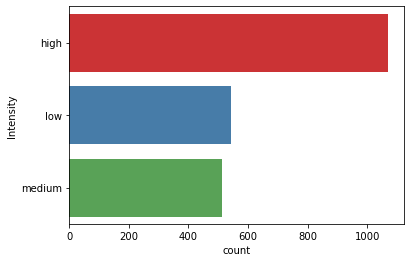

In [12]:
sns.countplot(y='Intensity', data=df, palette="Set1")

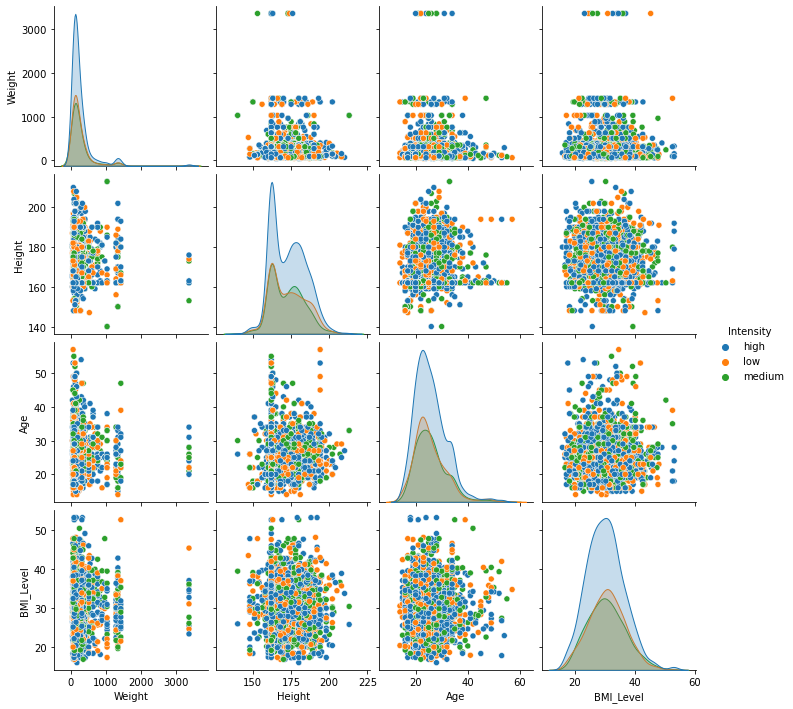

In [13]:
df_pairplot = sns.pairplot(df,hue='Intensity')

From the grapj above we can visualise the intensity of diseases based upon other varibles, we can examine that low and medium intensity are pretty close by but the highest intensity is with abnormal BMI levels, reflecting the age being lower (higher weight)

<AxesSubplot:xlabel='Intensity', ylabel='BMI_Level'>

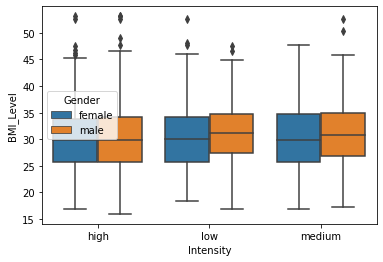

In [14]:
#sns.stripplot(x='Intensity', y= 'BMI_Level', hue='Gender',data = df,jitter = True)
sns.boxplot(x='Intensity',y='BMI_Level',data=df,hue='Gender')

In [15]:
print('Number diseases:', df.Disease.nunique())
df.groupby('Disease').size().sort_values(ascending = False)

Number diseases: 148


Disease
upper respiratory infection    28
bipolar disorder               28
psychotic disorder             25
malig162nt neoplasms           25
anxiety state                  24
                               ..
accident cerebrovascular        8
failure heart congestive        7
migraine disorders              7
kidney disease                  6
decubitus ulcer                 3
Length: 148, dtype: int64

In [16]:
df_copy = pd.read_csv('C:/Users/its_u/Downloads/OHAS_Dataset.csv')
top_5 = ['upper respiratory infection','psychotic disorder','chronic kidney failure',\
          'malig162nt neoplasms', 'bipolar disorder','anxiety state']

# make a new column with duplicated data
df_copy['Disease'] = df_copy['Disease'].copy()

# replace all specialties not in top 10 with 'Other' category
df_copy.loc[~df_copy.Disease.isin(top_5),'Disease'] = 'Other'

<AxesSubplot:xlabel='Disease', ylabel='Age'>

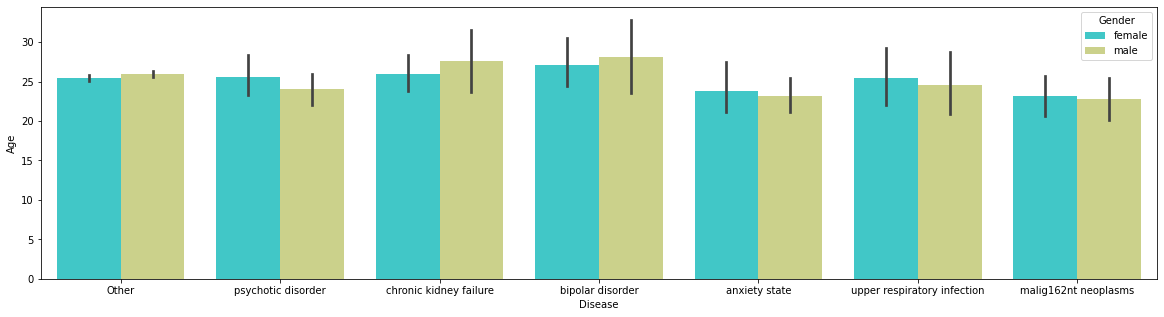

In [17]:
plt.figure(figsize=(20,5))
sns.barplot(x='Disease',y='Age',data=df_copy, palette='rainbow', hue='Gender')

General distribution of Age and BMI in order to see the variations of these two sepratelay 

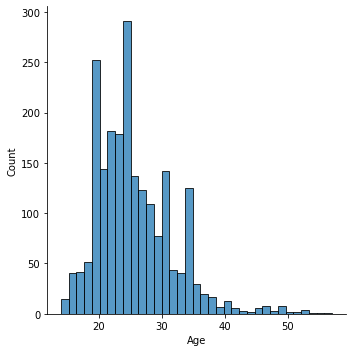

In [18]:
sns.displot(df.Age)

The is a left skwed plot, with mostly data of ages 20 - 30. We also have data of teenages and snior citizens

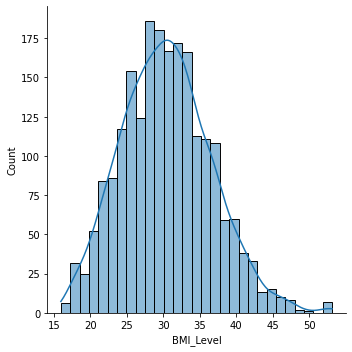

In [19]:
sns.displot(df.BMI_Level,kde=True)

The healthy bmi level is between 19 to 21. We can exmine an obesity level as BMI is greater than 25 for majority of the data, its somewhat normaily distributed 

- All the dieases to people older than 40 
- Which dieases has symptoms of fever 
- High intensity to male and females ratio 
- What are the common dieases with ibnormal BMI and have high severity to older age

In [20]:
dieases_on_older_people = df.loc[(df_copy['Age'] > 40)]


In [21]:
dflistSymptoms = df['Symptoms'].str.split()
diseases_wd_fever = df.loc[df['Symptoms'] == 'fever']
diseases_wd_fever['Disease']

1                                 influenza
78                              dehydration
141                           fibroid tumor
199                   sepsis (invertebrate)
387           tricuspid valve insufficiency
451                                lymphoma
583                  chronic kidney failure
644                infection uri162ry tract
734                         decubitus ulcer
798                     Alzheimer's disease
873                               hepatitis
928     acquired immuno-deficiency syndrome
1069                         diverticulitis
1088                        spasm bronchial
1174                          osteomyelitis
1217                         pyelonephritis
1227                         pyelonephritis
1405                      thrombocytopaenia
1429                              exanthema
1468                              infection
1484                             cellulitis
1502                     lymphatic diseases
1516                        gast

In [22]:

sr_people_with_high_intensity = df.loc[(df['Age'] < 40) & (df['Severity'] == 'high') & (df['Intensity'] == 'high')]
print('Number diseases:', sr_people_with_high_intensity.Disease.nunique())
#sr_people_with_high_intensity.groupby('Disease').size().sort_values(ascending = False)


Number diseases: 145


In [23]:
top_5 = ['upper respiratory infection','psychotic disorder','chronic kidney failure',\
          'malig162nt neoplasms', 'malig162nt neoplasm of prostate']

# make a new column with duplicated data
sr_people_with_high_intensity['Disease'] = sr_people_with_high_intensity['Disease'].copy()

# replace all specialties not in top 10 with 'Other' category
sr_people_with_high_intensity.loc[~sr_people_with_high_intensity.Disease.isin(top_5),'Disease'] = 'Other'

<ipython-input-23-ac8ad6a320fd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sr_people_with_high_intensity['Disease'] = sr_people_with_high_intensity['Disease'].copy()
C:\Users\its_u\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [24]:
sr_people_with_high_intensity.groupby('Disease').size()

Disease
Other                              478
chronic kidney failure               8
malig162nt neoplasm of prostate      8
malig162nt neoplasms                 8
psychotic disorder                   8
upper respiratory infection          9
dtype: int64

<AxesSubplot:xlabel='BMI_Level', ylabel='Disease'>

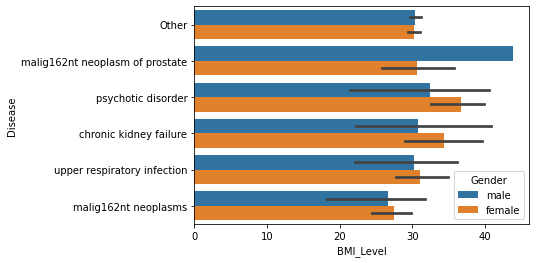

In [25]:
sns.barplot(y='Disease',x='BMI_Level',hue='Gender',data=sr_people_with_high_intensity)

In [27]:
#checking for Nas
df.isna().sum()

Disease         0
Disease_CUI    10
Symptoms        2
Symptom_CUI     0
Weight          0
Height          0
Intensity       2
Severity        1
Age             0
Gender          0
BMI_Level       0
Region          0
Season          0
dtype: int64

In [30]:
#adjusting Nas, - > as its not numeric we will remove these for now. 
df.dropna(inplace=True)

In [31]:
df.isna().sum()

Disease        0
Disease_CUI    0
Symptoms       0
Symptom_CUI    0
Weight         0
Height         0
Intensity      0
Severity       0
Age            0
Gender         0
BMI_Level      0
Region         0
Season         0
dtype: int64

In [33]:
df.shape

(2114, 13)

In [41]:
df.columns

Index(['Disease', 'Disease_CUI', 'Symptoms', 'Symptom_CUI', 'Weight', 'Height',
       'Intensity', 'Severity', 'Age', 'Gender', 'BMI_Level', 'Region',
       'Season'],
      dtype='object')

In [42]:
#Features vs target varibales
X = df.drop('Disease', axis=1)
y = df.Disease

In [43]:
#Train and Split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 55, test_size= 0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1585, 12), (529, 12), (1585,), (529,))

In [59]:
#creating lists for pipeline
#dropping symptoms for now as we have to do NLP on it 

drop_list=['Disease_CUI','Symptom_CUI','Region','Symptoms'],
numeric_list=['Weight','Height','Age','BMI_Level']
categorial_list_OneHot = ['Intensity', 'Severity','Season']
categorial_list_LabelEncoder =['Gender']

In [45]:
# t = [('drop_columns','drop',drop_list),('categorial_encoding', OneHotEncoder(), categorial_list),
#      ('numerical_standarizdation', MinMaxScaler(), numeric_list)]
# col_transform = ColumnTransformer(transformers=t,remainder='passthrough')

In [60]:

mapper = DataFrameMapper([
    (numeric_list, StandardScaler()),
    (categorial_list_OneHot, OneHotEncoder()),
    (categorial_list_LabelEncoder, LabelEncoder())  
])

# JUST TESTING NOT FINAL pls dont comment on metrics eval 

In [61]:
#Eample ML model testing 
model = DecisionTreeClassifier()

pipeline = Pipeline(steps=[('preperation',mapper), ('DecisionTreeClassifier', model)])
pipeline.fit(X_train,y_train)

C:\Users\its_u\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\its_u\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preperation',
                 DataFrameMapper(drop_cols=[],
                                 features=[(['Weight', 'Height', 'Age',
                                             'BMI_Level'],
                                            StandardScaler()),
                                           (['Intensity', 'Severity', 'Season'],
                                            OneHotEncoder()),
                                           (['Gender'], LabelEncoder())])),
                ('DecisionTreeClassifier', DecisionTreeClassifier())])

In [65]:
#### JUST TESTING NOT FINAL 

pipeline.fit(X_test,y_test)
print("Testing accuracy:" ,pipeline.score(X_test,y_test))

pipeline.fit(X_train,y_train)
print("Training accuracy:" ,pipeline.score(X_train,y_train))

Testing accuracy: 1.0
Training accuracy: 1.0


C:\Users\its_u\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\its_u\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\its_u\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\its_u\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expec